In [1]:
import json
import os
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
user_set = set()
with open('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/users.json', 'r') as file_open:
    loaded = json.loads(file_open.read())
    user_set.update(loaded[0].keys())

In [3]:
user_set

{'color',
 'deleted',
 'id',
 'is_admin',
 'is_app_user',
 'is_bot',
 'is_owner',
 'is_primary_owner',
 'is_restricted',
 'is_ultra_restricted',
 'name',
 'profile',
 'real_name',
 'team_id',
 'tz',
 'tz_label',
 'tz_offset',
 'updated'}

In [4]:
channels_set = set()
with open('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json', 'r') as file_open:
    loaded = json.loads(file_open.read())
    channels_set.update(loaded[0].keys())

In [5]:
channels_set

{'created',
 'creator',
 'id',
 'is_archived',
 'is_general',
 'members',
 'name',
 'pins',
 'purpose',
 'topic'}

## Memebership graph

In [6]:
# members and channels in one bag
def static_graph_builder(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        for i in loaded:
            G.add_node(i['name'], role='room')
            G.add_nodes_from(i['members'], role='users')
            for j in i['members']:
                G.add_edge(i['name'], j)
    return G

In [7]:
G = static_graph_builder('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [8]:
G.number_of_nodes()

54639

In [9]:
G.number_of_edges()

1062962

In [10]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 54639\nNumber of edges: 1062962\nAverage degree:  38.9085'

In [11]:
if nx.is_connected(G):
    print('Граф является ненаправленным и связным.')
else:
    print('Граф является ненаправленным и состоит из нескольких компонент.')

Граф является ненаправленным и состоит из нескольких компонент.


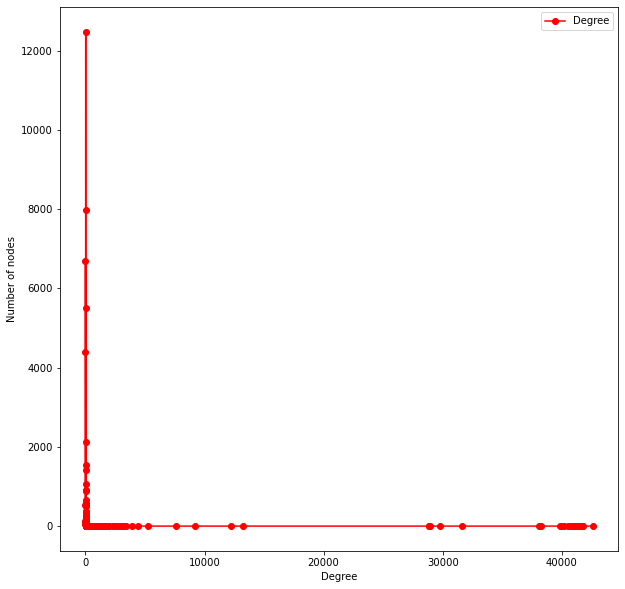

In [12]:
degree = dict(G.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 10))
plt.plot(degree_values, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

In [21]:
# user to user graph, where channels are edges
def static_graph_builder_user_to_user(path_):
    G = nx.MultiGraph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        for i in loaded:
            G.add_nodes_from(i['members'])
            for j in i['members']:
                for k in i['members']:
                    if j != k:
                        G.add_edge(j, k)
    return G

In [ ]:
G_us = static_graph_builder_user_to_user('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [ ]:
nx.info(G_us)

In [13]:
# channel to channel graph, where common users are edges
def static_graph_builder_channel_to_channel(path_):
    G = nx.MultiGraph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())        
        for i in loaded:
            G.add_node(i['name'])
            for j in loaded:
                G.add_node(j['name'])
                if i != j:
                    s = set(i['members'])
                    s.update(set(j['members']))
                    for k in s:
                        G.add_edge(i['name'], j['name'], k)
    return G

In [ ]:
G_ch = static_graph_builder_channel_to_channel('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [18]:
# channel to channel weighted graph, where common users are edges. With loops
def static_graph_weighted(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())        
        for i in loaded:
            G.add_node(i['name'])
            for j in loaded:
                G.add_node(j['name'])
                if i != j:
                    s = set(i['members'])
                    s.update(set(j['members']))
                    G.add_edge(i['name'], j['name'], weight=len(s))
    return G

In [20]:
G_w = static_graph_weighted('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [21]:
nx.info(G_w)

'Name: \nType: Graph\nNumber of nodes: 366\nNumber of edges: 66795\nAverage degree: 365.0000'

In [13]:
# weighted links between channels
from itertools import combinations

def static_graph_weighted2(path_):
    G = nx.Graph()
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        namelist = [i['name'] for i in loaded]
        G.add_nodes_from(namelist)
        edgeslist = [items for items in combinations(namelist, r=2)]
        for j in edgeslist:
            s = set()
            for i in loaded:
                if i['name'] == j[0] or i['name'] == j[1]:
                    s.update(i['members'])            
            if s:
                G.add_edge(j[0], j[1], weight=len(s))
    return G

In [14]:
# channels by users
def channel_fullness(path_):
    chF = {}
    with open(path_, 'r') as file_open:
        loaded = json.loads(file_open.read())
        chF = {i['name']: len(i['members']) for i in loaded}
    return chF

In [15]:
G_w2 = static_graph_weighted2('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [16]:
nx.info(G_w2)

'Name: \nType: Graph\nNumber of nodes: 366\nNumber of edges: 65805\nAverage degree: 359.5902'

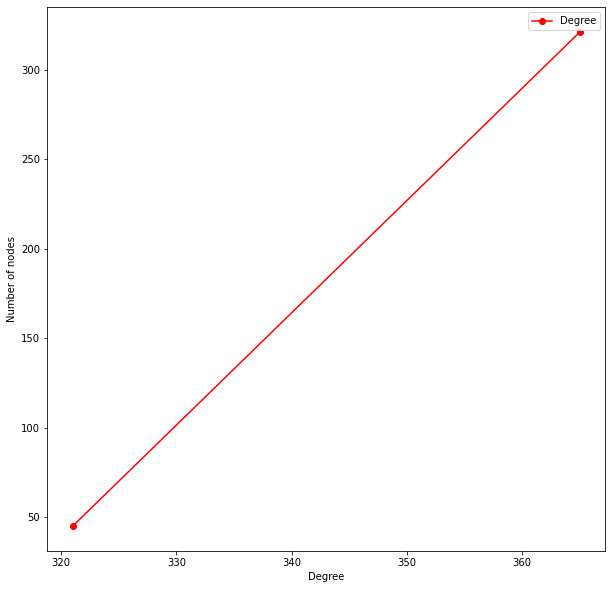

In [17]:
degree = dict(G_w2.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 10))
plt.plot(degree_values, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

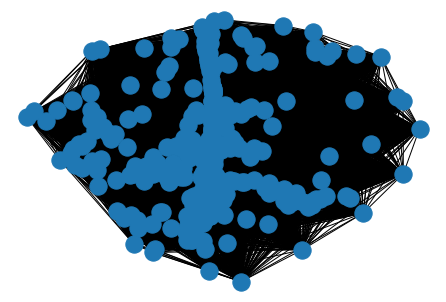

In [18]:
nx.draw(G_w2)

In [19]:
pr = nx.pagerank(G_w2)

In [20]:
pr

{'_general': 0.01916462855494472,
 '_random_talks': 0.0036510683610275507,
 'kaggle_crackers': 0.018491293955166126,
 'lang_r': 0.0173808587610939,
 '_meetings': 0.01855106768689426,
 'proj_dota2': 0.0015931431842375458,
 'lang_python': 0.018478498101845736,
 'lang_javascript': 0.0016090936381270553,
 'devops': 0.0020852196644073656,
 'visualization': 0.018414801313411222,
 'theory_and_practice': 0.018703207220355022,
 'deep_learning': 0.01880552059523921,
 '_jobs': 0.018791416740281938,
 'edu_courses': 0.018581665668234524,
 'gis': 0.0017604414909336708,
 'conference': 0.0021535243450653916,
 'nlp': 0.018150666822570223,
 'interesting_links': 0.01868074768808963,
 'deephack': 0.0017933207487344986,
 'network_analysis': 0.0018752282626369383,
 'big_data': 0.01729779643002541,
 '_random_politics': 0.0016998347560959316,
 'data_fest': 0.0024901956387156517,
 'ods_platform': 0.0015805855976449008,
 'z_bots': 0.0015422951201691534,
 'business': 0.0022651931619431125,
 '_meetings_spb': 0.00

In [21]:
pr_sorted = sorted(pr, key=pr.get, reverse=True)

In [22]:
pr_sorted

['_general',
 'mlcourse_ai_news',
 'deep_learning',
 '_jobs',
 'theory_and_practice',
 'interesting_links',
 'edu_courses',
 '_meetings',
 'kaggle_crackers',
 'lang_python',
 'datasets',
 'visualization',
 'welcome',
 'nlp',
 'mltrainings_live',
 'mltrainings_beginners',
 'lang_r',
 'big_data',
 'mlcourse_ai',
 '_top_jobs',
 '_top_science',
 '_top_talks',
 '_top_events',
 'mlcourse_ai_rus',
 'article_essence',
 'analytiсs',
 'career',
 '_random_talks',
 '_call_4_collaboration',
 'edu_books',
 '_jobs_hr',
 'looking_for_a_job',
 'gnomiki',
 'cv',
 'ods_resume_mastering',
 'class_cs231n',
 'hardware',
 'data_fest',
 'dlcourse_ai',
 'ml_pipeline',
 'class_dl_cmu',
 'reinforcement_learning',
 'ods_pet_projects',
 'business',
 'edu_academy',
 'ml4sg',
 'math',
 'trading',
 'recommender_systems',
 'ods_mentoring',
 'conference',
 'show_your_work',
 'sequences_series',
 'devops',
 '_meetings_spb',
 '_jobs_academy_phd',
 'bayesian',
 'edu_shad_exams',
 'coronavirus',
 'ods_sport',
 'audio_and_s

In [23]:
# channels by users
chF = channel_fullness('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020/channels.json')

In [24]:
chF_sorted = sorted(chF, key=pr.get, reverse=True)

In [25]:
chF_sorted

['_general',
 'mlcourse_ai_news',
 'deep_learning',
 '_jobs',
 'theory_and_practice',
 'interesting_links',
 'edu_courses',
 '_meetings',
 'kaggle_crackers',
 'lang_python',
 'datasets',
 'visualization',
 'welcome',
 'nlp',
 'mltrainings_live',
 'mltrainings_beginners',
 'lang_r',
 'big_data',
 'mlcourse_ai',
 '_top_jobs',
 '_top_science',
 '_top_talks',
 '_top_events',
 'mlcourse_ai_rus',
 'article_essence',
 'analytiсs',
 'career',
 '_random_talks',
 '_call_4_collaboration',
 'edu_books',
 '_jobs_hr',
 'looking_for_a_job',
 'gnomiki',
 'cv',
 'ods_resume_mastering',
 'class_cs231n',
 'hardware',
 'data_fest',
 'dlcourse_ai',
 'ml_pipeline',
 'class_dl_cmu',
 'reinforcement_learning',
 'ods_pet_projects',
 'business',
 'edu_academy',
 'ml4sg',
 'math',
 'trading',
 'recommender_systems',
 'ods_mentoring',
 'conference',
 'show_your_work',
 'sequences_series',
 'devops',
 '_meetings_spb',
 '_jobs_academy_phd',
 'bayesian',
 'edu_shad_exams',
 'coronavirus',
 'ods_sport',
 'audio_and_s

In [26]:
import functools
functools.reduce(lambda x, y : x and y, map(lambda p, q: p == q, chF_sorted, pr_sorted), True)

True

## Number of unic event

In [27]:
path_ = 'data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020'
_s_set = set()

In [28]:
def unic_counter(path_, _s_set):
    """
    Return:
    
    _s_set: set of unic json strings in parsed data (without inside strings)
    
    count: number of unic files
    
    event: number of unic events
    
    ts: list of all time stamps (non unic)
    
    files: dict, where key is a day, values is set of channels with activity
    
    ch_bd: dict, distributions active channels by days
    """
    count = 0
    event = 0
    ts = []
    files = {}
    
    names = os.listdir(path_)
    s_path = os.path.realpath(path_)
    for name in names:
        fullpath = os.path.join(s_path, name)
        if os.path.isdir(fullpath):
            inside = os.listdir(fullpath)
            for i in inside:
                inpath = os.path.join(fullpath, i)
                if os.path.splitext(inpath)[1] == '.json':
                    
                    # add file to file list
                    try: 
                        files[i.split('.')[0]].add(name)
                    except KeyError:
                        files[i.split('.')[0]] = set()
                        files[i.split('.')[0]].add(name)                        
                 
                    with open(inpath, 'r') as file_open:
                        loaded = json.loads(file_open.read())
                        for i in loaded:
                            _s_set.update(i.keys())
                            if i['type'] == 'message':
                                event +=1
                                ts.append(i['ts'])
                        count += 1
    return _s_set, count, event, ts, files

In [29]:
s, count, event, ts, files = unic_counter(path_, _s_set)

In [30]:
s

{'attachments',
 'blocks',
 'bot_id',
 'bot_link',
 'bot_profile',
 'channel',
 'client_msg_id',
 'comment',
 'display_as_bot',
 'edited',
 'file',
 'files',
 'hidden',
 'icons',
 'inviter',
 'is_intro',
 'item',
 'item_type',
 'last_read',
 'latest_reply',
 'name',
 'new_broadcast',
 'no_notifications',
 'old_name',
 'parent_user_id',
 'permalink',
 'purpose',
 'reactions',
 'replies',
 'reply_count',
 'reply_users',
 'reply_users_count',
 'room',
 'root',
 'source_team',
 'subscribed',
 'subtype',
 'team',
 'text',
 'thread_ts',
 'topic',
 'ts',
 'type',
 'upload',
 'upload_reply_to',
 'user',
 'user_profile',
 'user_team',
 'username',
 'x_files'}

In [31]:
print('Number of files: {}, number of message events: {}'.format(count, event))

Number of files: 85424, number of message events: 1850209


Итого у нас:

- **366** каналов
- **54679** юзеров
- **1850209** событий, созданных юзерами в каналах

# Event distribution

In [32]:
len(ts)

1850209

In [33]:
ts[0]

'1565029341.016700'

In [34]:
import time
from datetime import datetime
time.time()

1613606313.0356977

In [35]:
datetime.fromtimestamp(time.time())

datetime.datetime(2021, 2, 18, 1, 58, 33, 40885)

In [36]:
datetime.fromtimestamp(float(ts[0]))

datetime.datetime(2019, 8, 5, 20, 22, 21, 16700)

In [37]:
dt = [datetime.fromtimestamp(float(i)) for i in ts]

In [38]:
import matplotlib.dates as mdates

In [39]:
mpl_dt = mdates.date2num(dt)

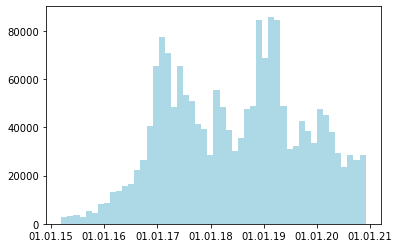

In [40]:
fig, ax = plt.subplots(1,1)
ax.hist(mpl_dt, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

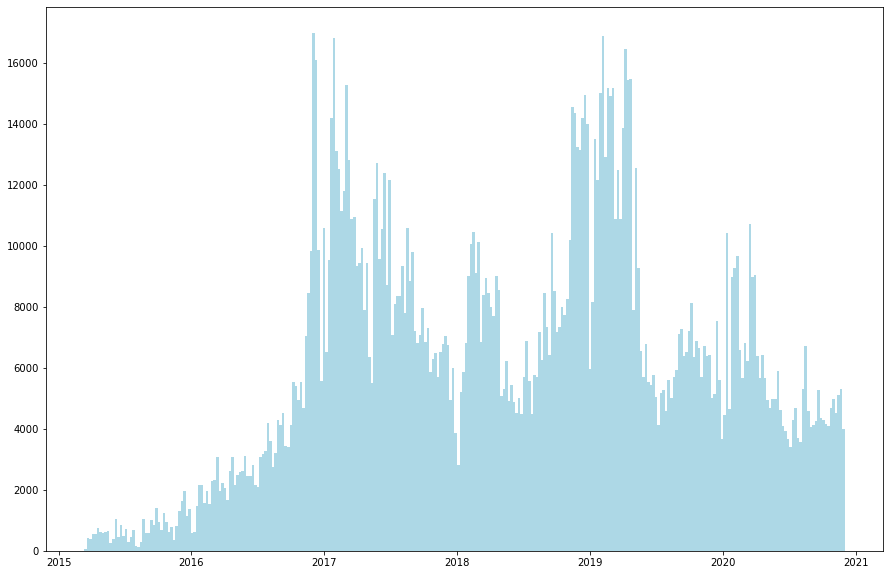

In [41]:
locator = mdates.AutoDateLocator()
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.hist(mpl_dt, bins=300, color='lightblue')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
plt.show()

# By day distribution

In [42]:
files

{'2019-08-05': {'_call_4_collaboration',
  '_jobs',
  '_meetings',
  '_meetings_ca',
  '_meetings_de',
  '_meetings_sf',
  '_meetings_siberia',
  '_meetings_spb',
  '_meetings_uk',
  '_meetings_ukraine',
  '_meetings_us',
  '_random_b',
  '_random_politics',
  '_random_talks',
  '_top_jobs',
  'big_data',
  'blockchain',
  'business',
  'career',
  'chess',
  'cv',
  'data_fest',
  'datasets',
  'deep_learning',
  'devops',
  'dlcourse_ai',
  'edu_academy',
  'edu_books',
  'edu_courses',
  'hardware',
  'interesting_links',
  'kaggle_crackers',
  'lang_python',
  'lang_r',
  'ml_pipeline',
  'mlcourse_ai',
  'mltrainings_beginners',
  'mltrainings_live',
  'nlp',
  'ods_habr',
  'ods_mentoring',
  'ods_sky_sport',
  'ods_sport',
  'ods_travel',
  'pr_jerk',
  'proj_kaggle_blindness',
  'proj_kaggle_champs',
  'proj_kaggle_fraud',
  'proj_kaggle_gan',
  'proj_kaggle_lanl',
  'proj_kaggle_protein',
  'proj_kaggle_salt',
  'proj_kaggle_severstal',
  'proj_nips_comp_19',
  'proj_punch_to_

In [43]:
import collections
files_sort = collections.OrderedDict(sorted(files.items()))
files_sort = [(datetime.strptime(i[0], '%Y-%m-%d'), len(i[1])) for i in files_sort.items()]
files_sort

[(datetime.datetime(2015, 3, 12, 0, 0), 2),
 (datetime.datetime(2015, 3, 15, 0, 0), 2),
 (datetime.datetime(2015, 3, 16, 0, 0), 2),
 (datetime.datetime(2015, 3, 17, 0, 0), 2),
 (datetime.datetime(2015, 3, 18, 0, 0), 2),
 (datetime.datetime(2015, 3, 19, 0, 0), 2),
 (datetime.datetime(2015, 3, 20, 0, 0), 2),
 (datetime.datetime(2015, 3, 21, 0, 0), 2),
 (datetime.datetime(2015, 3, 22, 0, 0), 5),
 (datetime.datetime(2015, 3, 23, 0, 0), 8),
 (datetime.datetime(2015, 3, 24, 0, 0), 2),
 (datetime.datetime(2015, 3, 25, 0, 0), 7),
 (datetime.datetime(2015, 3, 26, 0, 0), 6),
 (datetime.datetime(2015, 3, 27, 0, 0), 3),
 (datetime.datetime(2015, 3, 28, 0, 0), 7),
 (datetime.datetime(2015, 3, 29, 0, 0), 6),
 (datetime.datetime(2015, 3, 30, 0, 0), 5),
 (datetime.datetime(2015, 3, 31, 0, 0), 5),
 (datetime.datetime(2015, 4, 1, 0, 0), 11),
 (datetime.datetime(2015, 4, 2, 0, 0), 8),
 (datetime.datetime(2015, 4, 3, 0, 0), 7),
 (datetime.datetime(2015, 4, 4, 0, 0), 6),
 (datetime.datetime(2015, 4, 5, 0, 

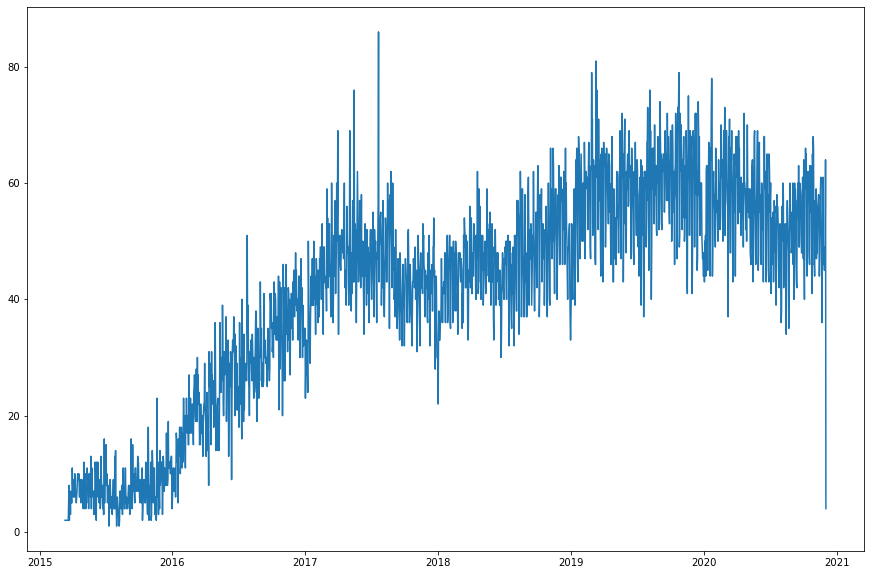

In [44]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(*zip(*files_sort))
plt.show()

# Temporal graph

In [45]:
def ts_builder(path_, list_of_channels, filename):
    
    dict_to_build = {}
    
    s_path = os.path.realpath(path_)

    for channel in list_of_channels:
        fullpath = os.path.join(s_path, channel, filename)
        with open(fullpath, 'r') as file_open:
            loaded = json.loads(file_open.read())
            
            for i in loaded:
                if i['type'] == 'message':
                    try:
                        try:
                            dict_to_build[i['user']].append((channel, i['ts']))
                        except KeyError:
                            dict_to_build[i['user']] = []
                            dict_to_build[i['user']].append((channel, i['ts']))
                    except KeyError:
                        continue
    return dict_to_build                      

In [46]:
dict_for_build = ts_builder('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020', files['2019-02-11'], '2019-02-11.json')

In [47]:
dict_for_build

{'U3LN56F7D': [('blockchain', '1549902160.000300'),
  ('blockchain', '1549903079.000800'),
  ('blockchain', '1549903087.001000'),
  ('datasets', '1549894084.016300'),
  ('datasets', '1549894550.017300'),
  ('datasets', '1549901293.028800'),
  ('datasets', '1549901753.029200'),
  ('datasets', '1549902757.030300')],
 'UDLTD07DL': [('blockchain', '1549902751.000500'),
  ('blockchain', '1549903562.001200'),
  ('mlcourse_ai_news', '1549918636.413300'),
  ('mlcourse_ai_news', '1549918654.413500'),
  ('mlcourse_ai', '1549910230.927300'),
  ('mlcourse_ai', '1549921585.042000'),
  ('mlcourse_ai', '1549925598.072100'),
  ('mlcourse_ai', '1549929087.085700')],
 'UEDCNHWRX': [('class_cs231n', '1549902252.003900')],
 'U4ZRFG1V0': [('class_cs231n', '1549902502.004300'),
  ('mlcourse_ai_news', '1549883793.021100'),
  ('welcome', '1549903429.056900'),
  ('career', '1549908946.071000'),
  ('theory_and_practice', '1549876293.016200'),
  ('_random_talks', '1549888425.007300'),
  ('_random_talks', '154988

In [48]:
import pathpy as pp

In [49]:
def network_builder(dict_to_build):
    
    day_net = pp.TemporalNetwork()
    
    for i in dict_to_build.values():
        
        last = 0 
        for j, k in enumerate(i):            
          
            if j == 0:
                day_net.add_edge(k[0], k[0], datetime.fromtimestamp(float(k[1])).strftime('%Y-%m-%d %H:%M:%S'))
                last = k[0]
                print(k[0], k[0], datetime.fromtimestamp(float(k[1])).strftime('%Y-%m-%d %H:%M:%S'))
            else:
                day_net.add_edge(last, k[0], datetime.fromtimestamp(float(k[1])).strftime('%Y-%m-%d %H:%M:%S'))
                print(last, k[0], datetime.fromtimestamp(float(k[1])).strftime('%Y-%m-%d %H:%M:%S'))
    return day_net

In [50]:
day_net = network_builder(dict_for_build)

blockchain blockchain 2019-02-11 18:22:40
blockchain blockchain 2019-02-11 18:37:59
blockchain blockchain 2019-02-11 18:38:07
blockchain datasets 2019-02-11 16:08:04
blockchain datasets 2019-02-11 16:15:50
blockchain datasets 2019-02-11 18:08:13
blockchain datasets 2019-02-11 18:15:53
blockchain datasets 2019-02-11 18:32:37
blockchain blockchain 2019-02-11 18:32:31
blockchain blockchain 2019-02-11 18:46:02
blockchain mlcourse_ai_news 2019-02-11 22:57:16
blockchain mlcourse_ai_news 2019-02-11 22:57:34
blockchain mlcourse_ai 2019-02-11 20:37:10
blockchain mlcourse_ai 2019-02-11 23:46:25
blockchain mlcourse_ai 2019-02-12 00:53:18
blockchain mlcourse_ai 2019-02-12 01:51:27
class_cs231n class_cs231n 2019-02-11 18:24:12
class_cs231n class_cs231n 2019-02-11 18:28:22
class_cs231n mlcourse_ai_news 2019-02-11 13:16:33
class_cs231n welcome 2019-02-11 18:43:49
class_cs231n career 2019-02-11 20:15:46
class_cs231n theory_and_practice 2019-02-11 11:11:33
class_cs231n _random_talks 2019-02-11 14:33:45

_random_talks conference 2019-02-12 08:44:57
_random_talks _random_talks 2019-02-12 08:45:30
_random_talks _random_talks 2019-02-12 09:10:34
_random_talks _random_talks 2019-02-12 09:20:47
data_fest data_fest 2019-02-11 13:13:40
data_fest chess 2019-02-11 15:40:42
data_fest chess 2019-02-11 15:49:07
data_fest _meetings_kgd 2019-02-11 15:20:23
data_fest _meetings_kgd 2019-02-11 19:02:12
data_fest _meetings_kgd 2019-02-12 00:47:20
data_fest _meetings_kgd 2019-02-12 00:47:38
data_fest _random_b 2019-02-11 18:20:06
data_fest _random_b 2019-02-11 18:44:13
data_fest _random_b 2019-02-11 19:39:23
_meetings_ukraine _meetings_ukraine 2019-02-11 16:31:41
_meetings_ukraine _meetings_ukraine 2019-02-11 16:48:14
_meetings_ukraine _meetings_ukraine 2019-02-11 17:18:24
_meetings_ukraine _meetings_ukraine 2019-02-11 17:50:28
_meetings_ukraine _meetings_ukraine 2019-02-11 17:53:01
_meetings_ukraine _meetings_ukraine 2019-02-11 21:53:56
edu_academy edu_academy 2019-02-11 12:50:27
edu_academy edu_academy

_random_b _random_b 2019-02-11 15:18:27
_random_b _random_b 2019-02-11 15:18:44
_random_b _random_b 2019-02-11 15:22:01
_random_b _random_b 2019-02-11 15:22:16
_random_b _random_b 2019-02-11 15:22:19
_random_b _random_b 2019-02-11 15:22:34
_random_b _random_b 2019-02-11 15:22:36
_random_b _random_b 2019-02-11 15:22:42
_random_b _random_b 2019-02-11 15:26:19
_random_b _random_b 2019-02-11 15:26:25
_random_b _random_b 2019-02-11 15:28:39
_random_b _random_b 2019-02-11 15:29:09
_random_b _random_b 2019-02-11 15:29:58
_random_b _random_b 2019-02-11 15:33:14
_random_b _random_b 2019-02-11 15:33:18
_random_b _random_b 2019-02-11 15:34:21
_random_b _random_b 2019-02-11 15:34:26
_random_b _random_b 2019-02-11 15:34:48
_random_b _random_b 2019-02-11 15:34:58
_random_b _random_b 2019-02-11 15:35:38
_random_b _random_b 2019-02-11 15:50:28
_random_b _random_b 2019-02-11 15:56:14
_random_b _random_b 2019-02-11 16:00:35
_random_b _random_b 2019-02-11 16:00:43
_random_b _random_b 2019-02-11 16:10:28


_random_b _random_b 2019-02-11 20:42:47
_random_b _random_b 2019-02-11 22:00:50
_random_b _random_b 2019-02-11 22:13:09
_random_b _random_b 2019-02-11 22:13:16
_random_b _random_b 2019-02-11 22:15:38
_random_b _random_b 2019-02-11 22:17:06
_random_b _random_b 2019-02-11 22:17:29
_random_b _random_b 2019-02-11 22:18:50
_random_b _random_b 2019-02-11 11:53:24
_random_b _random_b 2019-02-11 15:19:01
_random_b _random_b 2019-02-11 15:19:05
_random_b _random_b 2019-02-11 17:48:30
_random_b _random_b 2019-02-11 17:48:57
_random_b _random_b 2019-02-11 17:49:34
_random_b _random_b 2019-02-11 17:50:28
_random_b _random_b 2019-02-11 17:51:02
_random_b _random_b 2019-02-11 17:52:04
_random_b _random_b 2019-02-11 17:54:02
_random_b _random_b 2019-02-11 17:54:42
_random_b _random_b 2019-02-11 17:55:42
_random_b _random_b 2019-02-11 17:55:55
_random_b _random_b 2019-02-11 17:56:58
_random_b _random_b 2019-02-11 17:57:13
_random_b _random_b 2019-02-11 17:57:28
_random_b _random_b 2019-02-11 17:58:38


In [51]:
print(day_net)

Nodes:			61
Time-stamped links:	3115
Links/Nodes:		51.0655737704918
Observation period:	[1549872000, 1549958351]
Observation length:	 86351 
Time stamps:		 3039 
Avg. inter-event dt:	 28.42363396971692
Min/Max inter-event dt:	 1/1838


In [52]:
style = {    
  'ts_per_frame': 50, 
  'ms_per_frame': 50,
  'look_ahead': 20, 
  'look_behind': 20, 
  'node_size': 9, 
  'inactive_edge_width': 2,
  'active_edge_width': 8, 
  'label_color' : '#000000',
  'label_size' : '25px',
  'label_offset': [0,5],
    'height': 1200,
    'width': 1200,
  }

In [134]:
pp.visualisation.plot(day_net, **style)

#### visualisation

In [96]:
pp.visualisation.export_html(day_net, 'static/day_net.html', **style)

In [53]:
help(pp.visualisation.plot)

Help on function plot in module pathpy.visualisation.html:

plot(network, **params)
    Plots an interactive visualisation of pathpy objects
    in a jupyter notebook. This generic function supports instances of
    pathpy.Network, pathpy.TemporalNetwork, pathpy.HigherOrderNetwork,
    pathpy.MultiOrderModel, and pathpy.Paths. See description of different
    visualisations in the parameter description.
    
    Parameters
    ----------
    network: Network, TemporalNetwork, HigherOrderNetwork, MultiOrderModel, Paths
        The object to visualize. Depending on the type of the object passed, the following
        visualisations are generated:
            Network: interactive visualisation of a network with a force-directed layout.
            HigherOrderNetwork: interactive visualisation of the first-order network
                with forces calculated based on the higher-order network. By setting
                plot_higher_order_nodes=True a network with unprojected
               

#### static variant

In [54]:
def network_builder_static(dict_to_build):
    
    day_net_stat = nx.Graph()
    
    for i in dict_to_build.values():
        
        last = 0 
        for j, k in enumerate(i):            
          
            if j == 0:
                day_net_stat.add_edge(k[0], k[0])
                last = k[0]
                print(k[0], k[0])
            else:
                day_net_stat.add_edge(last, k[0])
                print(last, k[0])
    return day_net_stat

In [55]:
day_net_stat = network_builder_static(dict_for_build)

blockchain blockchain
blockchain blockchain
blockchain blockchain
blockchain datasets
blockchain datasets
blockchain datasets
blockchain datasets
blockchain datasets
blockchain blockchain
blockchain blockchain
blockchain mlcourse_ai_news
blockchain mlcourse_ai_news
blockchain mlcourse_ai
blockchain mlcourse_ai
blockchain mlcourse_ai
blockchain mlcourse_ai
class_cs231n class_cs231n
class_cs231n class_cs231n
class_cs231n mlcourse_ai_news
class_cs231n welcome
class_cs231n career
class_cs231n theory_and_practice
class_cs231n _random_talks
class_cs231n _random_talks
class_cs231n _random_talks
class_cs231n mlcourse_ai
class_cs231n mlcourse_ai
class_cs231n mlcourse_ai
class_cs231n kaggle_crackers
class_cs231n nlp
class_cs231n class_cs231n
mlcourse_ai_news mlcourse_ai_news
mlcourse_ai_news mlcourse_ai_news
mlcourse_ai_news mlcourse_ai_news
mlcourse_ai_news mlcourse_ai_news
mlcourse_ai_news chess
mlcourse_ai_news mlcourse_ai_news
mlcourse_ai_news mlcourse_ai_news
mlcourse_ai_news edu_courses
ml

_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b


_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b
_random_b _random_b


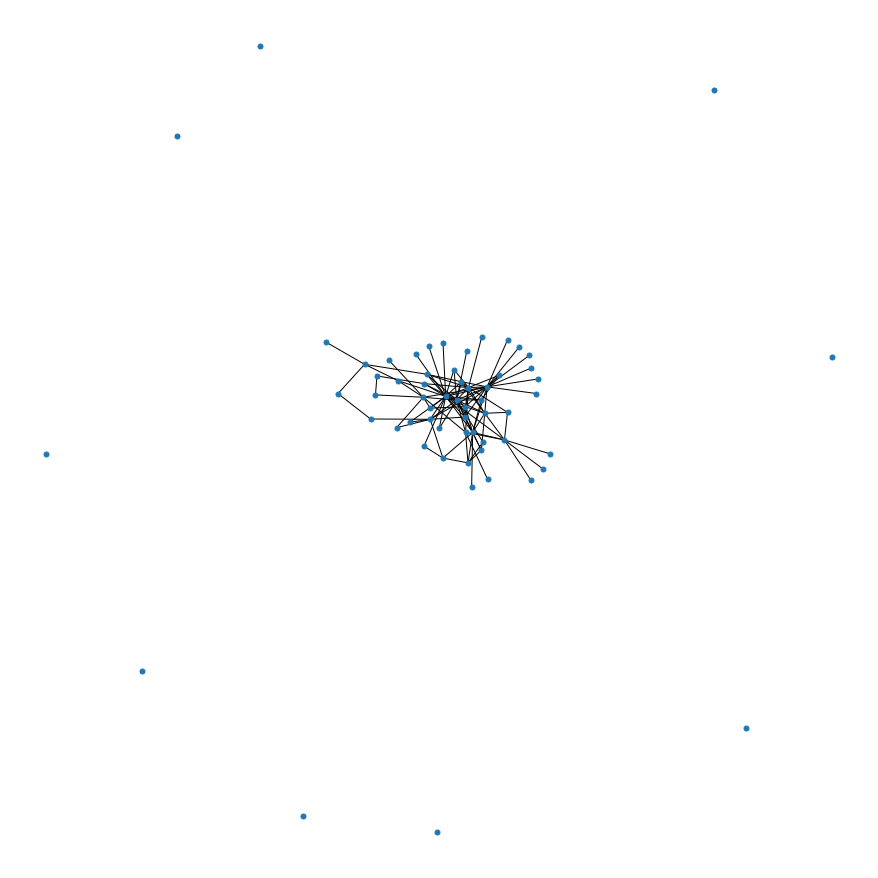

In [56]:
plt.figure(1, figsize=(12,12))
nx.draw(day_net_stat, node_size=25)
plt.show()

In [75]:
plt.savefig('static/day_net_static.png')

<Figure size 432x288 with 0 Axes>

# user to user message passing

In [57]:
def ts_builder_u_to_u(path_, list_of_channels, filename):
    
    list_to_build = []
    
    s_path = os.path.realpath(path_)

    for channel in list_of_channels:
        fullpath = os.path.join(s_path, channel, filename)
        with open(fullpath, 'r') as file_open:
            loaded = json.loads(file_open.read())
            
            for i in loaded:
                if i['type'] == 'message':
                    try:
                        list_to_build.append((i['ts'], i['user'], channel))
                    except KeyError:
                        continue
    return list_to_build    

In [58]:
dict_for_build_u_to_u = ts_builder_u_to_u('data/opendatascience-Slack-export-Mar-12-2015-Dec-2-2020', files['2019-02-11'], '2019-02-11.json')

In [59]:
dict_for_build_u_to_u

[('1549902160.000300', 'U3LN56F7D', 'blockchain'),
 ('1549902751.000500', 'UDLTD07DL', 'blockchain'),
 ('1549903079.000800', 'U3LN56F7D', 'blockchain'),
 ('1549903087.001000', 'U3LN56F7D', 'blockchain'),
 ('1549903562.001200', 'UDLTD07DL', 'blockchain'),
 ('1549902252.003900', 'UEDCNHWRX', 'class_cs231n'),
 ('1549902502.004300', 'U4ZRFG1V0', 'class_cs231n'),
 ('1549906587.008300', 'U8ZUVETU1', 'class_cs231n'),
 ('1549872287.005800', 'UG0UGC5K7', 'mlcourse_ai_news'),
 ('1549872579.006900', 'UDS0TECAC', 'mlcourse_ai_news'),
 ('1549874965.008600', 'U95SW31E0', 'mlcourse_ai_news'),
 ('1549875087.009500', 'UBA7N1YSG', 'mlcourse_ai_news'),
 ('1549875200.009600', 'UBHD83KJR', 'mlcourse_ai_news'),
 ('1549876692.012400', 'UF3BJHATT', 'mlcourse_ai_news'),
 ('1549879699.013800', 'U70NEV05R', 'mlcourse_ai_news'),
 ('1549883767.020700', 'UG4SQC8J2', 'mlcourse_ai_news'),
 ('1549883793.021100', 'U4ZRFG1V0', 'mlcourse_ai_news'),
 ('1549884289.028700', 'UG3E8KN9G', 'mlcourse_ai_news'),
 ('1549884421.02

In [60]:
def user_to_user_network_builder(dict_to_build_u_to_u):
    
    """Passing message when user make post
    1. add user id and ts to set, labeled by channel's name
    2. if user is make post, look for previous posts in that channels
    3. if we seen new posts -> pass message from post owners to user at current ts
    4. add user id and ts to set, labeled by user's name    
    """
    
    day_net = pp.TemporalNetwork()
    channels = {}
    users = {}
    
    for i in dict_to_build_u_to_u:
        
        if i[2] in channels.keys():
            
            if i[1] in users.keys(): 
         
                diff = channels[i[2]].difference(users[i[1]])

                for j in diff:

                    day_net.add_edge(j[1], i[1], datetime.fromtimestamp(float(i[0])).strftime('%Y-%m-%d %H:%M:%S'))

                    users[i[1]].add(j)
                    
            else:
                users[i[1]] = set()
                users[i[1]].add((i[1], i[0]))
        
            channels[i[2]].add((i[1], i[0]))

        else: 
    
            channels[i[2]] = set()
            channels[i[2]].add((i[1], i[0]))
        
    return day_net

In [61]:
day_net_u_to_u = user_to_user_network_builder(dict_for_build_u_to_u)

In [62]:
print(day_net_u_to_u)

Nodes:			3320
Time-stamped links:	99330
Links/Nodes:		29.91867469879518
Observation period:	[1549872165, 1549958351]
Observation length:	 86186 
Time stamps:		 2283 
Avg. inter-event dt:	 37.767747589833476
Min/Max inter-event dt:	 1/4135


In [63]:
style = {    
  'ts_per_frame': 50, 
  'ms_per_frame': 50,
  'node_size': 5, 
  'inactive_edge_width': 0.0,
  'active_edge_width': 0.1, 
  'label_color' : '#000000',
  'label_size' : '0'
  }

In [64]:
pp.visualisation.export_html(day_net_u_to_u, 'static/day_net_u_to_u.html', **style)

In [65]:
causal_paths = pp.path_extraction.temporal_paths.paths_from_temporal_network_dag(day_net_u_to_u, delta=1)

2021-02-18 02:24:50 [Severity.INFO]	Constructing time-unfolded DAG ...
2021-02-18 02:24:55 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		101583
Roots:		99251
Leaves:		2332
Links:		99330
Acyclic:	None

2021-02-18 02:24:55 [Severity.INFO]	Generating causal trees for 99251 root nodes ...
2021-02-18 02:25:00 [Severity.INFO]	finished.


In [66]:
print(causal_paths)

Total path count: 		99330.0 
[Unique / Sub paths / Total]: 	[99330.0 / 198660.0 / 297990.0]
Nodes:				3320 
Edges:				99330
Max. path length:		1
Avg path length:		1.0 
Paths of length k = 0		0.0 [ 0.0 / 198660.0 / 198660.0 ]
Paths of length k = 1		99330.0 [ 99330.0 / 0.0 / 99330.0 ]



In [68]:
causal_paths2 = pp.path_extraction.paths_from_temporal_network_dag(day_net_u_to_u, delta=2)

2021-02-18 02:26:53 [Severity.INFO]	Constructing time-unfolded DAG ...
2021-02-18 02:27:02 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		103909
Roots:		99251
Leaves:		4658
Links:		198660
Acyclic:	None

2021-02-18 02:27:02 [Severity.INFO]	Generating causal trees for 99251 root nodes ...
2021-02-18 02:27:07 [Severity.INFO]	finished.


In [69]:
print(causal_paths2)

Total path count: 		99330.0 
[Unique / Sub paths / Total]: 	[99330.0 / 198660.0 / 297990.0]
Nodes:				3320 
Edges:				99330
Max. path length:		1
Avg path length:		1.0 
Paths of length k = 0		0.0 [ 0.0 / 198660.0 / 198660.0 ]
Paths of length k = 1		99330.0 [ 99330.0 / 0.0 / 99330.0 ]



In [70]:
causal_paths3 = pp.path_extraction.sample_paths_from_temporal_network_dag(day_net_u_to_u, delta=3, num_roots=50)

2021-02-18 02:29:15 [Severity.INFO]	Constructing time-unfolded DAG ...
2021-02-18 02:29:26 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		106218
Roots:		99251
Leaves:		6967
Links:		297990
Acyclic:	None

2021-02-18 02:29:26 [Severity.INFO]	Generating causal trees for 50 root nodes ...
2021-02-18 02:29:26 [Severity.INFO]	Analyzing tree 5/50 ...
2021-02-18 02:29:26 [Severity.INFO]	Analyzing tree 10/50 ...
2021-02-18 02:29:26 [Severity.INFO]	Analyzing tree 15/50 ...
2021-02-18 02:29:26 [Severity.INFO]	Analyzing tree 20/50 ...
2021-02-18 02:29:26 [Severity.INFO]	Analyzing tree 25/50 ...
2021-02-18 02:29:26 [Severity.INFO]	Analyzing tree 30/50 ...
2021-02-18 02:29:26 [Severity.INFO]	Analyzing tree 35/50 ...
2021-02-18 02:29:26 [Severity.INFO]	Analyzing tree 40/50 ...
2021-02-18 02:29:26 [Severity.INFO]	Analyzing tree 45/50 ...
2021-02-18 02:29:26 [Severity.INFO]	Analyzing tree 50/50 ...
2021-02-18 02:29:26 [Severity.INFO]	finished.


In [71]:
print(causal_paths3)

Total path count: 		51.0 
[Unique / Sub paths / Total]: 	[51.0 / 102.0 / 153.0]
Nodes:				96 
Edges:				51
Max. path length:		1
Avg path length:		1.0 
Paths of length k = 0		0.0 [ 0.0 / 102.0 / 102.0 ]
Paths of length k = 1		51.0 [ 51.0 / 0.0 / 51.0 ]



In [72]:
causal_paths = pp.path_extraction.temporal_paths.paths_from_temporal_network_dag(day_net, delta=1)

2021-02-18 03:38:01 [Severity.INFO]	Constructing time-unfolded DAG ...
2021-02-18 03:38:01 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		6128
Roots:		3046
Leaves:		3041
Links:		3089
Acyclic:	None

2021-02-18 03:38:01 [Severity.INFO]	Generating causal trees for 3046 root nodes ...
2021-02-18 03:38:01 [Severity.INFO]	finished.


In [73]:
print(causal_paths)

Total path count: 		3048.0 
[Unique / Sub paths / Total]: 	[164.0 / 1546.0 / 4594.0]
Nodes:				61 
Edges:				112
Max. path length:		1
Avg path length:		0.25360892388451445 
Paths of length k = 0		2275.0 [ 52.0 / 1546.0 / 3821.0 ]
Paths of length k = 1		773.0 [ 112.0 / 0.0 / 773.0 ]



In [74]:
causal_paths = pp.path_extraction.temporal_paths.paths_from_temporal_network_dag(day_net, delta=2)

2021-02-18 03:38:26 [Severity.INFO]	Constructing time-unfolded DAG ...
2021-02-18 03:38:26 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		9109
Roots:		2995
Leaves:		6022
Links:		6178
Acyclic:	None

2021-02-18 03:38:26 [Severity.INFO]	Generating causal trees for 2995 root nodes ...
2021-02-18 03:38:26 [Severity.INFO]	Analyzing tree 599/2995 ...
2021-02-18 03:38:26 [Severity.INFO]	Analyzing tree 1198/2995 ...
2021-02-18 03:38:26 [Severity.INFO]	Analyzing tree 1797/2995 ...
2021-02-18 03:38:26 [Severity.INFO]	Analyzing tree 2396/2995 ...
2021-02-18 03:38:26 [Severity.INFO]	Analyzing tree 2995/2995 ...
2021-02-18 03:38:26 [Severity.INFO]	finished.


In [75]:
print(causal_paths)

Total path count: 		2997.0 
[Unique / Sub paths / Total]: 	[164.0 / 1546.0 / 4543.0]
Nodes:				61 
Edges:				112
Max. path length:		1
Avg path length:		0.2579245912579246 
Paths of length k = 0		2224.0 [ 52.0 / 1546.0 / 3770.0 ]
Paths of length k = 1		773.0 [ 112.0 / 0.0 / 773.0 ]



In [89]:
causal_paths = pp.path_extraction.sample_paths_from_temporal_network_dag(day_net, delta=250, num_roots=50)

2021-02-18 04:23:55 [Severity.INFO]	Constructing time-unfolded DAG ...
2021-02-18 04:24:14 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		289540
Roots:		993
Leaves:		286453
Links:		772250
Acyclic:	None

2021-02-18 04:24:14 [Severity.INFO]	Generating causal trees for 50 root nodes ...
2021-02-18 04:24:14 [Severity.INFO]	Analyzing tree 5/50 ...
2021-02-18 04:24:14 [Severity.INFO]	Analyzing tree 10/50 ...
2021-02-18 04:24:17 [Severity.INFO]	Analyzing tree 15/50 ...
2021-02-18 04:24:21 [Severity.INFO]	Analyzing tree 20/50 ...
2021-02-18 04:24:21 [Severity.INFO]	Analyzing tree 25/50 ...
2021-02-18 04:24:22 [Severity.INFO]	Analyzing tree 30/50 ...
2021-02-18 04:24:26 [Severity.INFO]	Analyzing tree 35/50 ...
2021-02-18 04:24:26 [Severity.INFO]	Analyzing tree 40/50 ...
2021-02-18 04:24:33 [Severity.INFO]	Analyzing tree 45/50 ...
2021-02-18 04:25:25 [Severity.INFO]	Analyzing tree 50/50 ...
2021-02-18 04:25:25 [Severity.INFO]	finished.


In [90]:
print(causal_paths)

Total path count: 		57.0 
[Unique / Sub paths / Total]: 	[32.0 / 88.0 / 145.0]
Nodes:				26 
Edges:				21
Max. path length:		2
Avg path length:		0.7368421052631579 
Paths of length k = 0		19.0 [ 11.0 / 80.0 / 99.0 ]
Paths of length k = 1		34.0 [ 19.0 / 8.0 / 42.0 ]
Paths of length k = 2		4.0 [ 2.0 / 0.0 / 4.0 ]



Выводы:
- очень большой разброс в разнице по времени между таймстампами
- не получается собрать графы высших порядков